In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.gofplots as smg
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Export the data

In [3]:
df = pd.read_excel('main Model - advertising data.xlsx')

#### Exploratory data analysis

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Correlation**

In [9]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<Axes: >

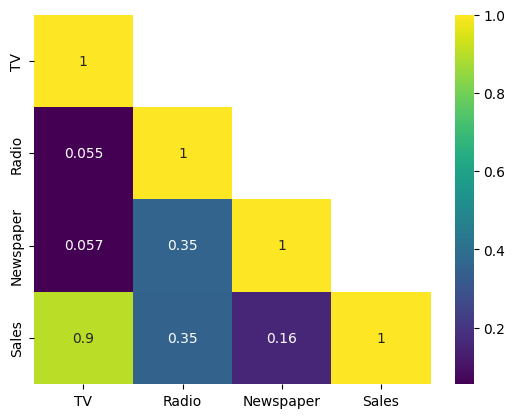

In [10]:

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='viridis', )

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()

In [15]:
numeric_df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,1,25,45000,200,4.5,12
1,2,34,55000,350,7.0,18
2,3,45,65000,500,8.0,22
3,4,22,30000,150,3.0,10
4,5,29,47000,220,4.8,13


**VIF analysis**

In [12]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
variable_set = df[['TV', 'Radio', 'Newspaper', 'Sales']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["variable"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(variable_set.values, i)
                          for i in range(len(variable_set.columns))]

print(vif_data)

    variable        VIF
0         TV  24.836854
1      Radio   6.626771
2  Newspaper   3.250167
3      Sales  44.037500


In [14]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# All variables model

In [17]:
model03 = smf.ols(formula='Sales ~ TV + Radio', data=df)

In [18]:
results03= model03.fit()
print(results03.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          2.39e-100
Time:                        11:34:04   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.0

In [20]:
p_values = results03.pvalues
z_scores = results03.tvalues 
coefficients = results03.params

summary_table = pd.DataFrame({
    'Variable': z_scores.index,
    'P-Value': p_values,
    'Z-Score': z_scores.abs(),
    'Coefficient': coefficients
})

# variables with p-values higher than 0.05 (insignificant variables)
signif_summary_table = summary_table[summary_table['P-Value'] <= 0.05]

# Sort the values (abs value)
signif_summary_table['Abs. Z-Score'] = signif_summary_table['Z-Score'].abs()
sorted_summary_table = signif_summary_table.sort_values(by='Abs. Z-Score', ascending=False)

# sorted values - table
sorted_summary_table[['Abs. Z-Score', 'Coefficient']]

,Abs. Z-Score,Coefficient
TV,39.725976,0.054449
Intercept,15.951604,4.630879
Radio,13.522224,0.107175


**Making predictions with the model equation**

In [27]:
intercept = coefficients['Intercept']
coef_1 = coefficients['TV']
coef_2 = coefficients['Radio']


# DataFrame
PREDICTION_RESULT = pd.read_excel('Prediction dataset - advertising data(1).xlsx')

PREDICTION_RESULT['predicted value'] = (
    intercept + 
    coef_1 * PREDICTION_RESULT['TV'] +
    coef_2 * PREDICTION_RESULT['Radio']
)

round(PREDICTION_RESULT, 3)

,TV,Radio,Newspaper,predicted value
0,292.9,28.3,43.2,23.612
1,112.9,17.4,38.6,12.643
2,97.2,1.5,30.0,10.084
3,265.6,20.0,0.3,21.236
4,95.7,1.4,7.4,9.992


Residuals

In [21]:
residuals03 = results03.resid

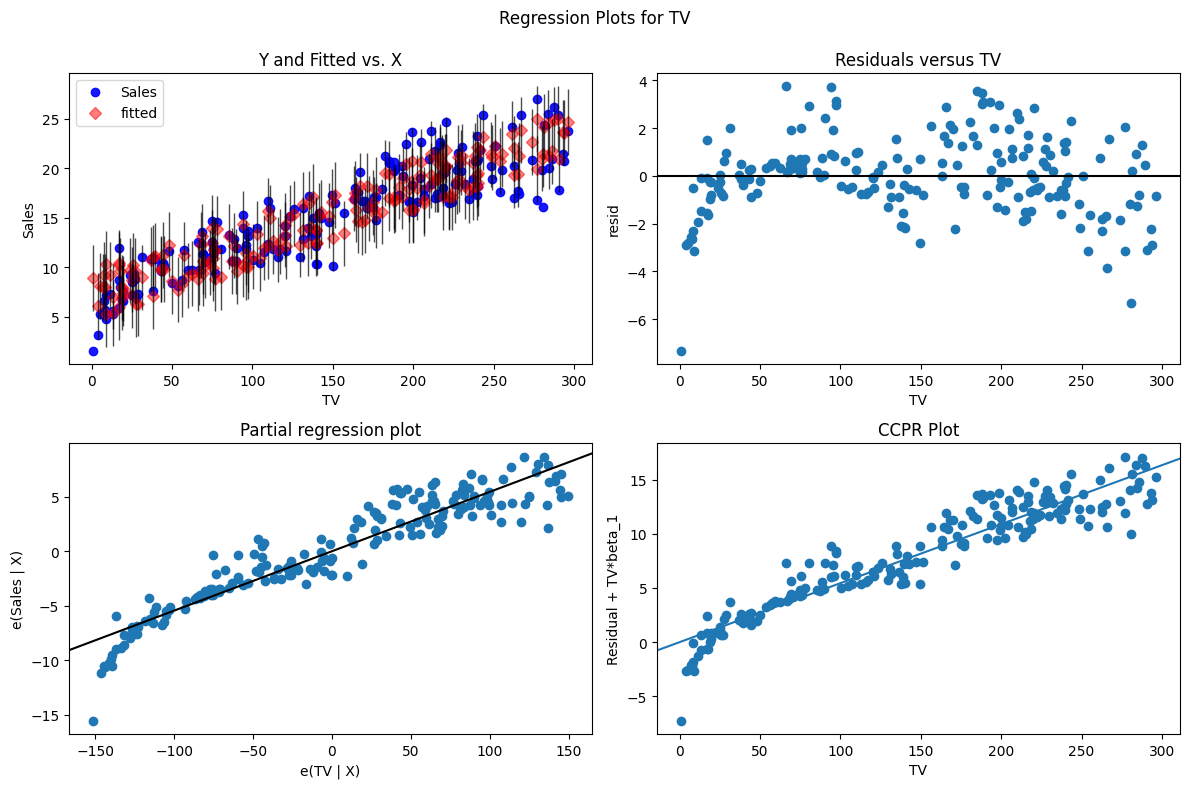

In [24]:
fig = plt.figure(figsize=(12,8))

#create regression plots
fig = sm.graphics.plot_regress_exog(results03, 'TV', fig=fig) 

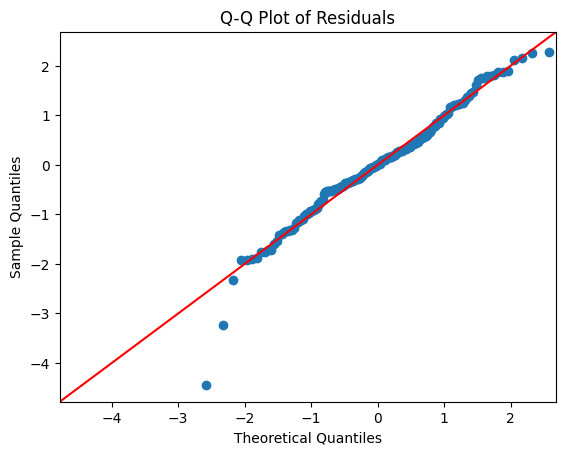

In [23]:
sm.qqplot(residuals03, dist = stats.norm, fit=True, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

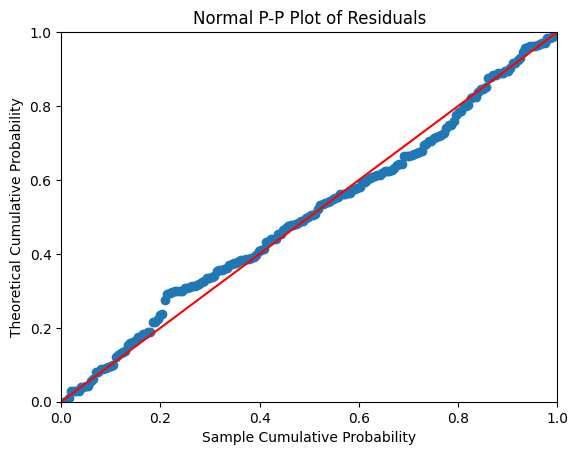

In [25]:
pplot = smg.ProbPlot(residuals03, dist = stats.norm, fit=True)
fig = pplot.ppplot(line='45')
plt.title("Normal P-P Plot of Residuals")
plt.xlabel("Sample Cumulative Probability")
plt.ylabel("Theoretical Cumulative Probability")
plt.show()

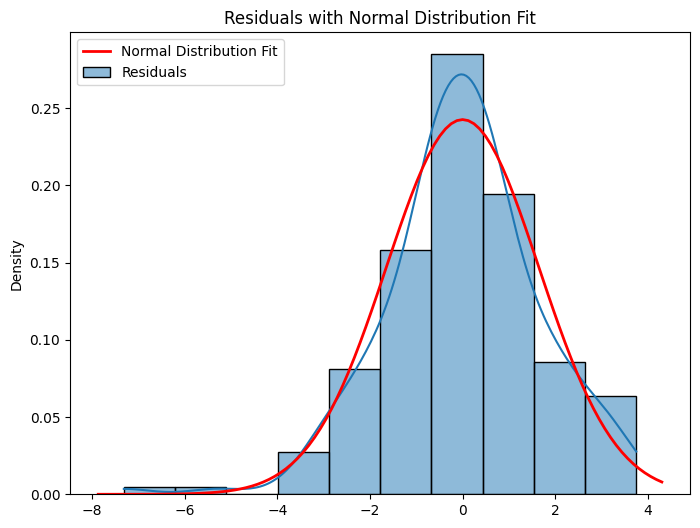

In [26]:

plt.figure(figsize=(8, 6))


sns.histplot(residuals03, bins=10, kde=True, label='Residuals', stat='density')

mu, std = stats.norm.fit(residuals03)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, color='red', linewidth=2, label='Normal Distribution Fit')

plt.legend()
plt.title("Residuals with Normal Distribution Fit")

plt.show()
